<img src="dh_logo.png" align="right" width="50%">

# Santander Kaggle
## Customer Transaction Prediction

<img src="santander.png"  >

### Neste desafio será necessário prever a variável target do DataSet

Para acessar e participar desta competição no Kaggle [clique aqui](https://www.kaggle.com/c/santander-customer-transaction-prediction/overview)

Para baixar os dados [clique aqui](https://www.kaggle.com/c/santander-customer-transaction-prediction/data)

## Santander: Overview da proposta do desafio

No Santander, nossa missão é ajudar pessoas e empresas a prosperar. Estamos sempre procurando maneiras de ajudar nossos clientes a entender sua saúde financeira e identificar quais produtos e serviços podem ajudá-los a atingir suas metas monetárias.

Nossa equipe de ciência de dados está desafiando continuamente nossos algoritmos de aprendizado de máquina, trabalhando com a comunidade global de dados científicos para garantir que possamos identificar com mais precisão novas maneiras de resolver nosso desafio mais comum, problemas de classificação binária como: um cliente está satisfeito? Um cliente comprará este produto? Um cliente pode pagar este empréstimo?

Neste desafio, convidamos a Kagglers a nos ajudar a identificar quais clientes farão uma transação específica no futuro, independentemente do volume de dinheiro transacionado. Os dados fornecidos para esta competição têm a mesma estrutura que os dados reais que temos disponíveis para resolver este problema.

In [3]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline



import warnings
warnings.filterwarnings("ignore")

## Exercício 1.

#### Explore as variáveis explicatórias do problema e entenda como elas influenciam na variável `target`. Realize uma análise exploratória (Exploratory Data Analysis - EDA).

In [1]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [10]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [11]:
train_data = pd.read_csv('train.csv')

In [12]:
train_data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


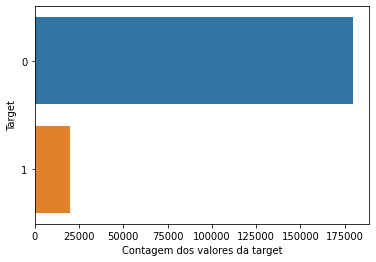

In [14]:
sns.countplot(y=train_data.target ,data=train_data)
plt.xlabel("Contagem dos valores da target")
plt.ylabel("Target")
plt.show()

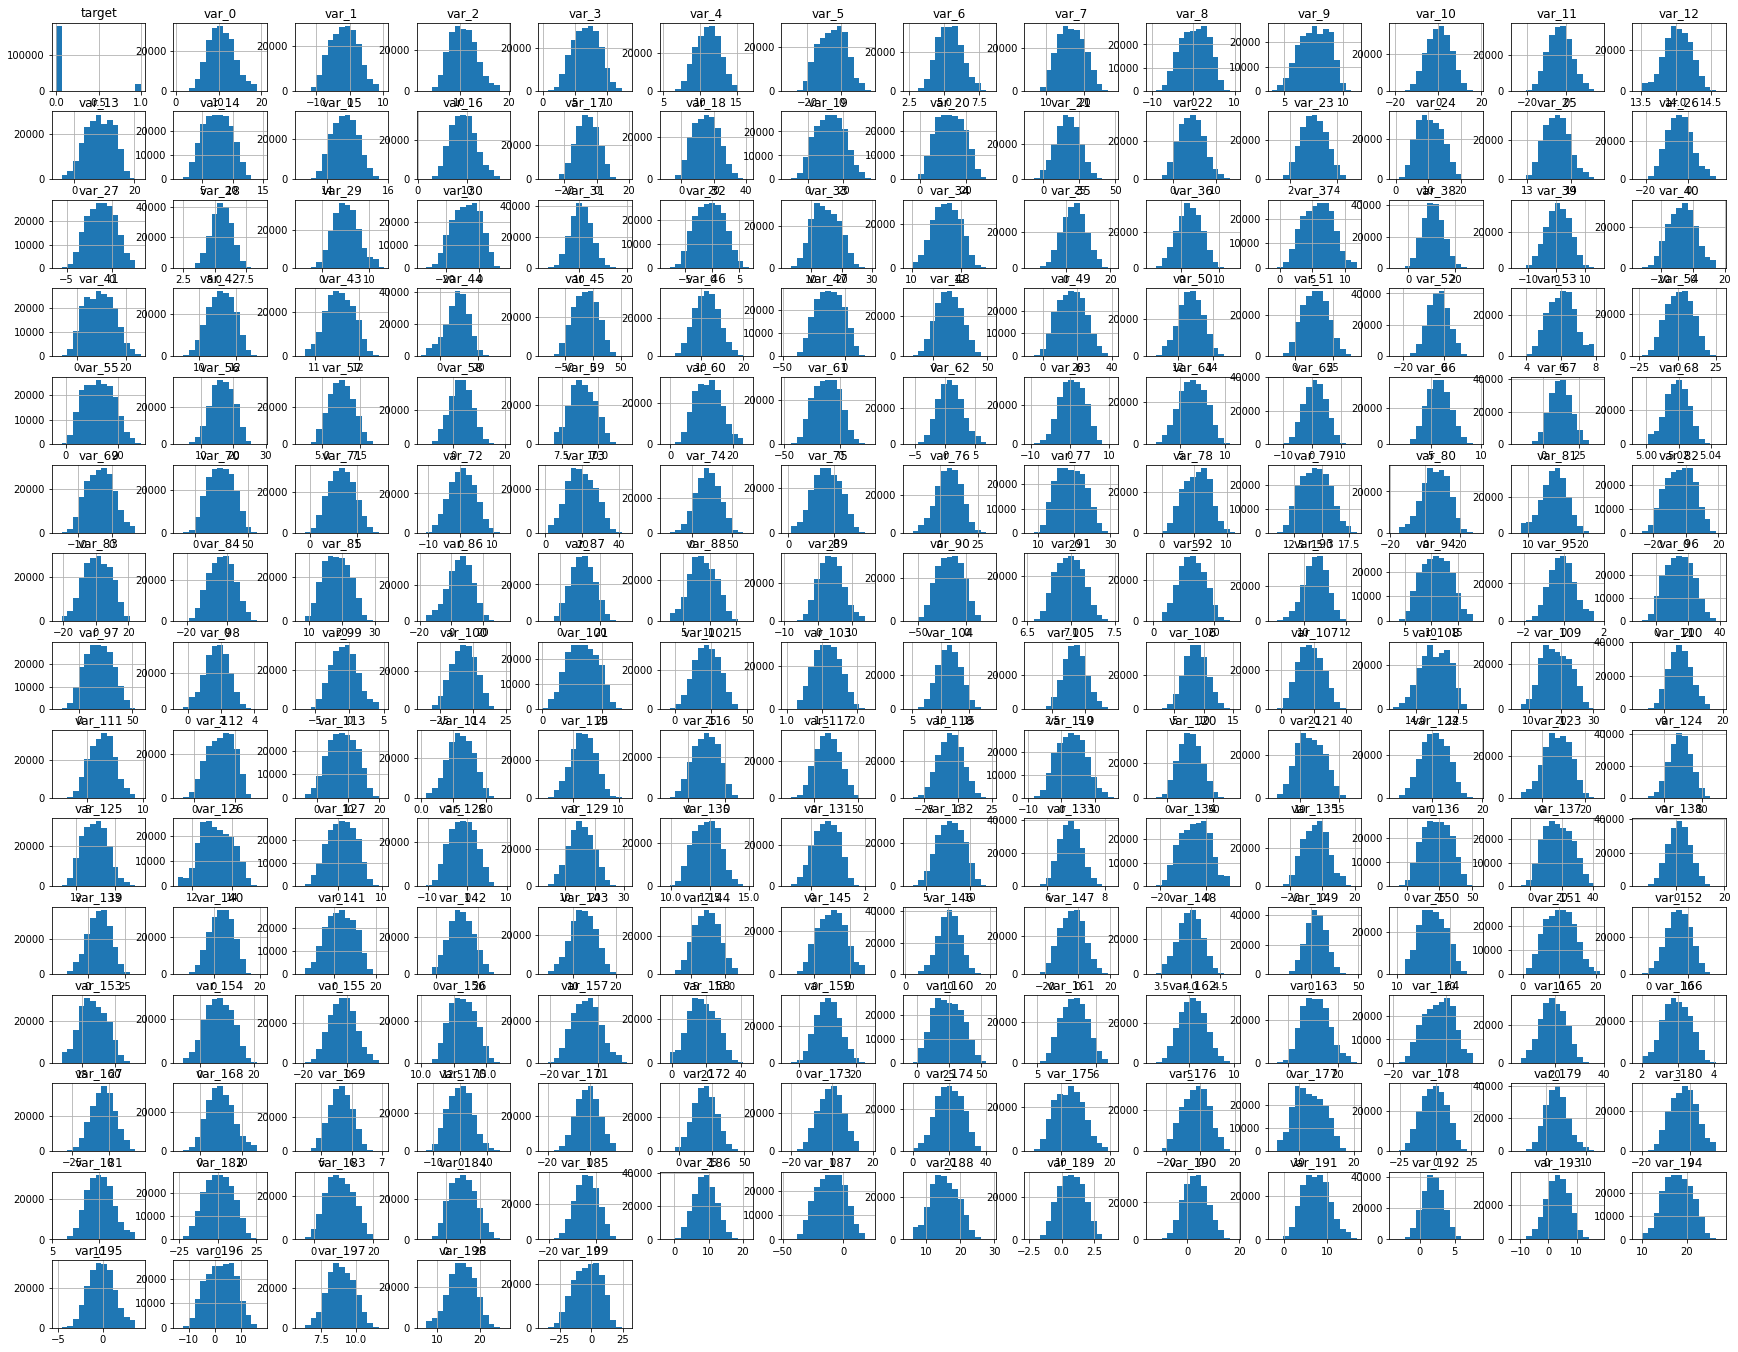

In [15]:
train_data.hist(figsize=(30,24),bins = 15)
plt.title("Distribuição das variáveis")
plt.show()


In [1]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [4]:
test_data = pd.read_csv('test.csv')

#### Calcule as estatísticas
Dados necessários: mean, median, amount, std, amount unique, % missing, type da coluna, max e min

In [5]:
test_data.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [16]:
from sklearn.preprocessing import MinMaxScaler

mmscale = MinMaxScaler()  
X_train = mmscale.fit_transform(train_data.drop(['ID_code','target'],axis=1))  
X_test = mmscale.transform(test_data.drop(['ID_code'], axis=1))

In [17]:
from sklearn.decomposition import PCA

pca = PCA()  
a = pca.fit_transform(X_train) 
b = pca.transform(X_test)

In [18]:
variancia_pca = pca.explained_variance_ratio_

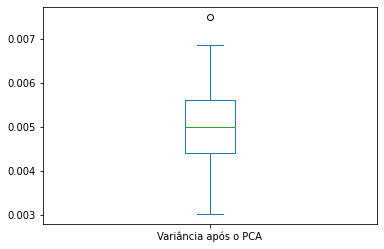

In [19]:
pd.DataFrame(variancia_pca,columns=['Variância após o PCA']).plot(kind='box')

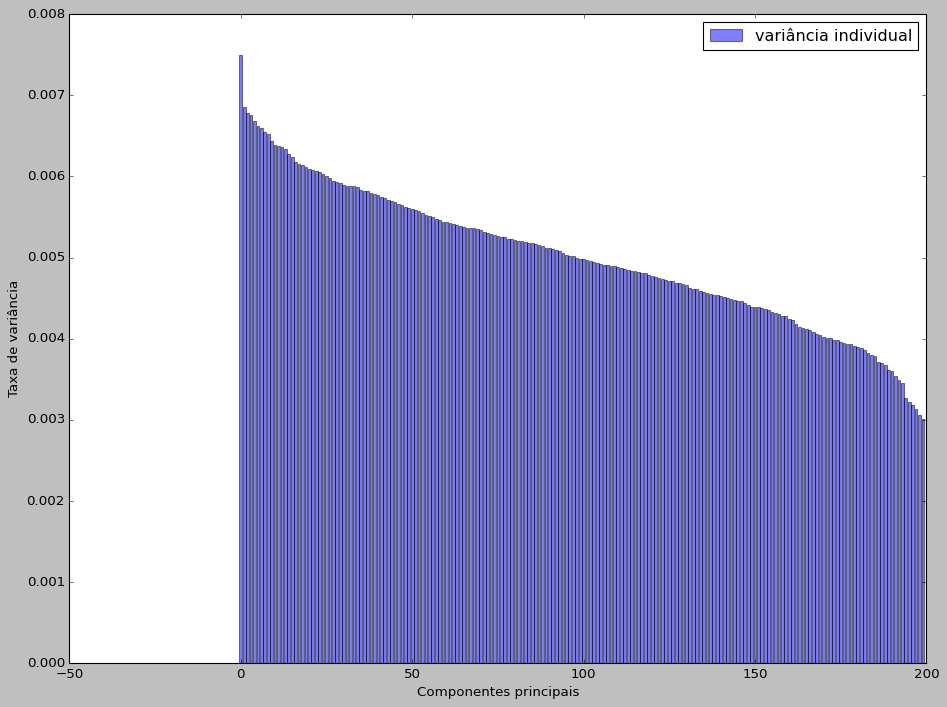

In [20]:
with plt.style.context('classic'):
    plt.figure(figsize=(12, 9))

    plt.bar(range(200), variancia_pca, alpha=0.5, align='center',
            label='variância individual')
    plt.ylabel('Taxa de variância')
    plt.xlabel('Componentes principais')
    plt.legend(loc='best')
    plt.tight_layout()

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [21]:
sum(variancia_pca[:100])

0.5694636501105672

In [22]:
X_train = train_data.iloc[:, 2:].values.astype('float64')
y_train = train_data['target'].values

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import QuantileTransformer

pipeline = make_pipeline(QuantileTransformer(output_distribution='normal'), GaussianNB())
pipeline.fit(X_train, y_train)

Pipeline(steps=[('quantiletransformer',
                 QuantileTransformer(output_distribution='normal')),
                ('gaussiannb', GaussianNB())])

#### Aplique o método [`missing`](https://bulbapedia.bulbagarden.net/wiki/MissingNo.) para checar se há dados faltantes.
Use: import missingno as msno

In [24]:
import missingno as msno

#### Faça uma contagem da distribuição de classes de rótulos no `dataset` de treino.

#### Divida os dados entre treino e teste.

In [26]:
X_train.drop(['ID_code', 'target'], axis = 1)
X_test.drop(['ID_code', 'target'], axis = 1)

AttributeError: ignored

#### Realize o escalonamento dos dados com o método [`MinMaxScaler()`]() 

#### Realize a clusterizacao, aplicando o modelo [`KMeans()`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) e plote a distribuiçãodos `clusters` em função de sua pontuação de inércia `.inertia_`, para escolher o melhor número de clusters com o teste do cotovelo.

#### Analise o gráfico de cotovelo e escolha o melhor número de clusters. Em seguida aplique o modelo de `kMeans` e realize previsões para seus dados.

#### Aplique o método silhueta e veja se você encontra o mesmo K ideal. Analise o output do método

## Aplique agora os métodos DBSCAN e os algoritmos aglomerativos hierárquivos single-linkage, complete-linkage,  e avarege-linkage.
## Compare-os usando o método de silhouette.